<a href="https://colab.research.google.com/github/bush4matull4/PREDICTIVE-ANALYSIS-USING-MACHINE-LEARNING/blob/main/PREDICTIVE_ANALYSIS_USING_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/archive/HeartDiseaseTrain-Test.csv")

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
for col in df.columns:
    print(col, df[col].unique())


age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex ['Male' 'Female']
chest_pain_type ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
resting_blood_pressure [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholestoral [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 31

# Convert textual numbers to actual numbers

In [ ]:
vessels_colored_by_flourosopy: ['Zero', 'One', 'Two', 'Three']


In [ ]:
# Replace textual numbers with numeric
df.replace({
    'Zero': 0,
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four':4
}, inplace=True)


/tmp/ipython-input-14-13273877.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


# Check value counts of target

Target value counts:
target
1    526
0    499
Name: count, dtype: int64


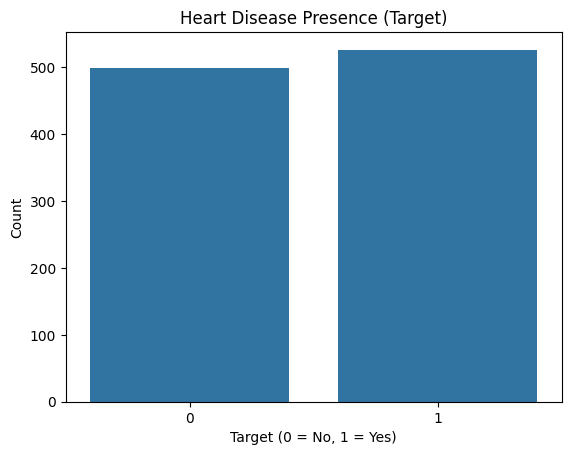

In [ ]:
print("Target value counts:")
print(df_encoded['target'].value_counts())

# Optional: Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df_encoded)
plt.title('Heart Disease Presence (Target)')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Plot features vs target

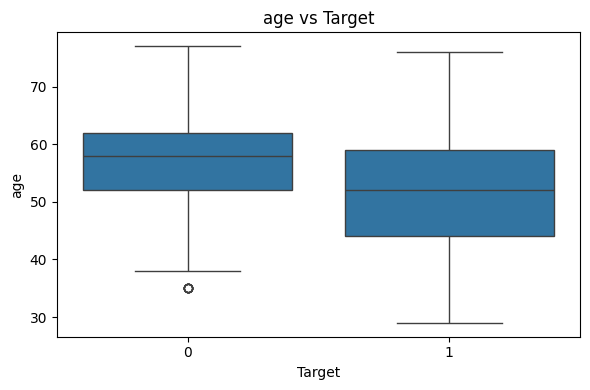

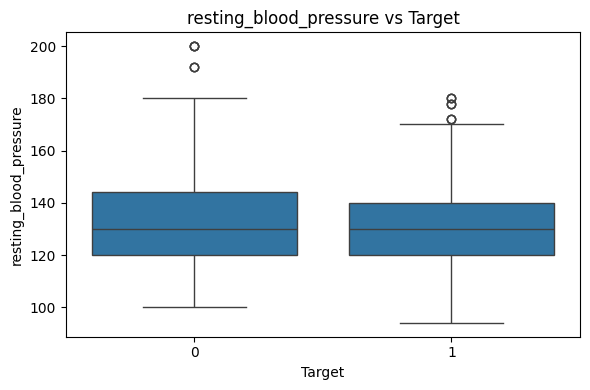

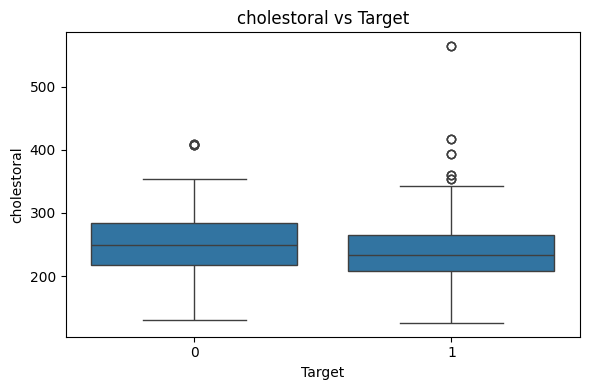

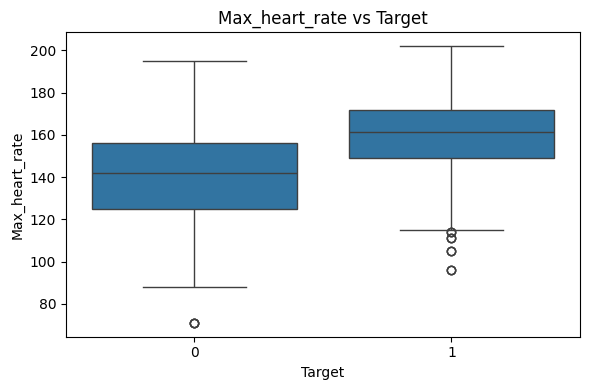

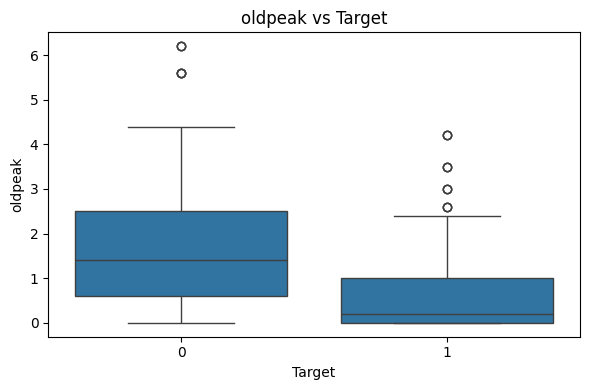

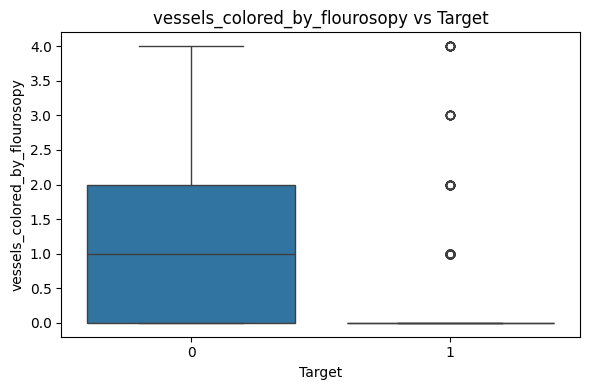

In [ ]:
numerical_columns = df_encoded.drop('target', axis=1).select_dtypes(include='number').columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df_encoded)
    plt.title(f'{col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# encoding and scaling:

In [ ]:
# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Optional: print selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())
# Encode binary columns
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({'Yes': 1, 'No': 0})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical features
df_encoded = pd.get_dummies(df, columns=['chest_pain_type', 'rest_ecg', 'slope', 'thalassemia'], drop_first=True)

# Split X and y
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Check for missing values

In [ ]:
df_encoded.isnull().sum()


,0
age,0
sex,1025
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,1025
Max_heart_rate,0
exercise_induced_angina,1025
oldpeak,0
vessels_colored_by_flourosopy,0
target,0


# Fill missing values

In [ ]:
df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)


In [ ]:
print(df_encoded.isnull().sum())


age                                    0
sex                                 1025
resting_blood_pressure                 0
cholestoral                            0
fasting_blood_sugar                 1025
Max_heart_rate                         0
exercise_induced_angina             1025
oldpeak                                0
vessels_colored_by_flourosopy          0
target                                 0
chest_pain_type_Atypical angina        0
chest_pain_type_Non-anginal pain       0
chest_pain_type_Typical angina         0
rest_ecg_Normal                        0
rest_ecg_ST-T wave abnormality         0
slope_Flat                             0
slope_Upsloping                        0
thalassemia_No                         0
thalassemia_Normal                     0
thalassemia_Reversable Defect          0
dtype: int64


In [ ]:
df_encoded = df_encoded.dropna(axis=1)  # Drops columns with any NaN


# Preprocessing

In [ ]:
# Split into X and y
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)


#  Feature Selection

In [ ]:
# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Optional: print selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())



Selected Features: ['age', 'Max_heart_rate', 'oldpeak', 'vessels_colored_by_flourosopy', 'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina', 'rest_ecg_ST-T wave abnormality', 'slope_Flat', 'thalassemia_Reversable Defect']


# Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# Model Training

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Evaluation

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7853658536585366
Confusion Matrix:
 [[74 28]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.76      0.84      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.79      0.78       205

